# 基礎操作講解

## jupyter的cell
1. 每一個cell可以分別運行 (快捷鍵：ctrl+enter)
2. 一個cell之中，若非print()，通常只會顯示最後的結果

In [252]:
3+5
9-2

7

In [253]:
print(3*5)
print(9/2)

15
4.5


## 變數命名
不為保留字、開頭不能是數字、大小寫是有差的

In [15]:
a, b = 3, 5
print(a,b)

3 5


In [13]:
# 變數名稱不可以是「保留字」
and = 3

SyntaxError: invalid syntax (967448499.py, line 1)

In [16]:
# 開頭不能是數字
3a = 5

SyntaxError: invalid syntax (2510859924.py, line 1)

In [20]:
# 大小寫是有差的
A = 7
print(a,A)

3 7


In [28]:
# 變數賦值：overwrite
print(a)
a = 13
print(a)

3
13


## import怎麼用？ 
python有許多open source的套件可以用，經常要引進<br>
如果import失敗的話會出現ModuleNotFoundError，需要去terminal下指令conda install 某套件

In [33]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

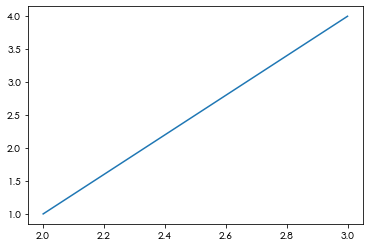

In [230]:
from matplotlib import pyplot 

# 折線圖
pyplot.plot([3,2],[4,1])  # 畫出 (x,y) 分別為 (3,4), (2,1) 兩點一線
pyplot.show()

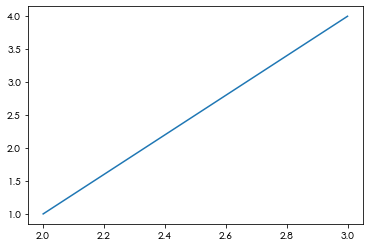

In [24]:
import matplotlib.pyplot as plt
plt.plot([3,2],[4,1])  # 畫出 (x,y) 分別為 (3,4), (2,1) 兩點一線
plt.show()

# 資料型態
基本資料型態：int float string bool 可以互相轉換！<br>
存儲多筆：list, array, dataframe<br>
array裡面的元素是同一類型，list卻不必

## 基本資料型態
整數(int)、浮點數(float)、字串(string)、布林(bool)<br>
可以用type()訪問資料型態。

In [ ]:
print(type(1),      # 整數
      type(3.6436), # 浮點數
      type(1E3),    # 浮點數
      type("哈囉~"), # 字串，用雙引號
      type('哈囉~'), # 字串，用單引號
      type(True),   # 布林
      type(False),  # 布林
      sep = "\n")   # 表示

<class 'int'> <class 'float'> <class 'float'> <class 'str'> <class 'str'> <class 'bool'> <class 'bool'>


In [44]:
# 趁機補充：可以在某method前打上 ? 詢問他有的attributes
#         在jupyter lab中可以將鼠標停在某method前面，按shift+tab，也可以訪問他有的attributes

?print

Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
Type:      builtin_function_or_method


In [46]:
# 資料型態是可以互相轉換的：
print(type(str(3)))  # 把int變string
print(type(int("7"))) # 把string變int

<class 'str'>
<class 'int'>


## 多筆資料儲存
* set、tuple、dictionary、list、numpy.array...etc.<br>
這裡只介紹list跟array、dictionary

In [235]:
# list是python內建的陣列，內容可以是不同的資料型態

list1 = [1,1E3,"哈囉",True]
for i in list1:
    print(type(i))

<class 'int'>
<class 'float'>
<class 'str'>
<class 'bool'>


In [255]:
list1[0]

1

In [237]:
# array是屬於套件numpy裡頭提供的一種陣列儲存，array裡頭的資料都會是同一種資料型態

import numpy as np
array1 = np.array([1,1E3,"哈囉",True]) 

for i in array1:
    print(type(i))

<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>


In [238]:
array1[2]

'哈囉'

In [231]:
student = {16:"Amy",
          20:"Ben",
          1:"Carol"}
student[20]

'Ben'

* array的多維度可以用.shape訪問

In [69]:
x = np.array([[4, 9, 2, 10],
              [6, 9, 7, 12]])
x.shape

(2, 4)

# 邏輯運用

## if elif else
```
# 若達成條件A就執行甲動作，否則執行乙動作
if 條件A:         
    執行甲動作
else:
    執行乙動作
```
使用時機：有條件需要判斷，並採取相應措施。<br>
<br>
【例一】<br>
>當$ H_0: \mu = 0 $，若該資料所對應的p-value < 0.05時印出拒絕虛無假設，否則接受虛無假設。<br>

```
(將統計檢定的p-value指定給變數「p_value」後...)
if p_value < 0.05:
    print("拒絕虛無假設")
else:
    print("接受虛無假設")
```
【例二（下方程式）】<br>
>A大學的等級評價有ABC三等，若分數超過（包含）80分者為A等，未滿80分但超過70分者為B等，70分（包含）以下者得C。

In [256]:
score = 75
if score>=80:
    print("A")
elif score>70:
    print("B")
else:
    print("C")

B


## for loop
```
# 指定對象中有多個元素，對每個元素都執行甲動作
for 元素 in 指定對象們:         
    對元素執行甲動作
```
使用時機：需要對指定對象們逐個執行相同任務時。<br>
<br>
【例一】<br>
> 原料A、B、C的單價分別為20,30,10，今年欲購買的數量分別為100,120,80，求三項原料分別預計花費的購買成本。<br>
Hint: range(X)代表製造出0,1,...,X-1的數值，所以i會在每一圈當中，一次成為0,1,...,X-1。

In [5]:
price = [20,30,10]
quantity = [100,120,80]
for j in range(3):    
    print(price[j]*quantity[j])

2000
3600
800


【例二】<br>
> 已知某母體的平均數為3，找出樣本 = [9,2,7,31,20,-5] 之中高於平均數者。

In [247]:
mean = 3
for a in [9,2,7,31,20,-5]:
    if a > mean:
        print(a)

9
7
31
20


## while loop
```
# 只要符合某條件，就一直重複甲動作，直到不符合某條件時。
while 某條件:         
    執行甲動作
```
使用時機：需要重覆某任務直至某條件達成或未達成，與for loop不同的是，未知總圈數會是多少，要達到或未達到某條件才停止。<br>
<br>
【例一】<br>
> 某部門希望購買多種機台，但預算有限，因此該部門排序了購買意願，若尚有預算再購買下一機台，假設希望購買的機台依序為A、B、C、D，單價分別為100,95,10,99（單位:千元）。在盡量買進所有機台的情況下，求預算為210（千元）時，會剩下多少預算（千元）？

In [4]:
price = [100,95,10,99]
money = 210
i = 0
while money-price[i]>=0:    # 當購買下一個機台會有剩餘預算時，
    money = money-price[i]  # 執行購買計劃
    i = i+1                 # i幫助紀錄想購買的機台順序
print(money)

5


【例二（下方程式）】<br>
> 一會計部門期末希望對某存貨進行抽樣盤點，確認該存貨是否存在，在訂定抽樣數目後，隨機決定從某個樣本編號開始，依照樣本編號每間隔兩個樣本抽取一次（假設從編號1開始抽，接著下個樣本為編號4，再來是編號7...），即進行系統性抽樣，直到抽滿所需要的樣本個數。令初始點為編號6的樣本，欲抽出總共十個樣本，求所有被抽取的樣本編號。<br>
Hint1: 若要在list往後新增一值，可使用.append()，如A = [1,6]，而A.append(7)會使A = [1,6,7]<br>
Hint2: len()可以獲得list的長度，如A = [1,6]，len(A)=2

In [1]:
counts = 10
start = 6
samples = [6]
while len(samples)< counts:
    start = start+3      # 也可以寫 start+=3
    samples.append(start)

In [2]:
samples

[6, 9, 12, 15, 18, 21, 24, 27, 30, 33]

In [6]:
len(samples)

10

# 基礎敘述統計

## 內建

In [61]:
list1 = [3,6,9,-10,-1]
print(min(list1))
print(max(list1))

-10
9


## 以numpy(np)實踐:

In [68]:
list2 = [3,6,9,7]
print("The mean is",np.mean(list2))
print("The median is",np.median(list2))
print("The 75-th percentile is",np.percentile(list2, 75))
print("The variance is",np.var(list2))
print("The standard deviation is",np.std(list2))
print("驗算var開根號後為std: ",np.sqrt(np.var(list2)))

The mean is 6.25
The median is 6.5
The 75-th percentile is 7.5
The variance is 4.6875
The standard deviation is 2.165063509461097
驗算var開根號後為std:  2.165063509461097


* outlier有哪些？

In [258]:
list3 = [0, -5, 6, 39, 12, -33, 7, 9, 90, -2]
Q3 = np.percentile(list3, 75)
Q1 = np.percentile(list3, 25)

outliers = []
for i in list3:
    if i > Q3+1.5*(Q3-Q1) or i < Q1 -1.5*(Q3-Q1):
        outliers.append(i)

In [259]:
outliers

[39, -33, 90]

In [79]:
# FYI for迴圈的簡寫
outliers = [ i for i in list3  if i > 1.5*(Q3-Q1) or i < -1.5*(Q3-Q1)]
outliers

[39, -33, 90]

# pandas

In [ ]:
#  summary
#  concat
#  agg
#  dummy

## 讀取excel檔案示範

In [4]:
# 讀取csv案示範

import pandas as pd
pd.read_csv("/Users/Grace/Desktop/110statistic_1-master/sticker.csv")

,Unnamed: 0,name,price
0,1,Conan,50
1,2,Pui pui,100
2,3,kanahei's small animals,50


In [5]:
# 如果符合當前路徑，就不用加上前面的資料夾路徑

pd.read_csv("sticker.csv")

,Unnamed: 0,name,price
0,1,Conan,50
1,2,Pui pui,100
2,3,kanahei's small animals,50


In [51]:
# 注意路徑中有中文可能報錯，可用以下方法

import os
Path = "/Users/Grace/Desktop/python/統計/sticker.csv"
pwd = os.getcwd() # 抓取目前路徑
os.chdir(os.path.dirname(Path)) #改變當前工作目錄，到指定路徑
data_revision = pd.read_csv(os.path.basename(Path))
os.chdir(pwd) # 返回原始路徑
data_revision

,Unnamed: 0,groups,num
0,0,M,46
1,1,S,8
2,2,C,12
3,3,F,6


In [6]:
# 讀取xlsx（活頁簿）示範

pd.read_excel("try_2.xlsx")

,Unnamed: 0,groups,num
0,0,M,46
1,1,S,8
2,2,C,12
3,3,F,6


In [64]:
# 若是少了欄位的資料，避免讀取第一列為欄位
pd.read_csv("report card.csv")

,statistic,80
0,linear algebra,90
1,calculus,60


In [71]:
pd.read_csv("report card.csv", header = None)
# 在自己命名欄位名稱（之後會教）

,0,1
0,statistic,80
1,linear algebra,90
2,calculus,60


## 認識dataframe

In [7]:
sticker = pd.read_csv("sticker.csv")

In [114]:
sticker.dtypes

Unnamed: 0     int64
name          object
price          int64
dtype: object

In [115]:
sticker.columns

Index(['Unnamed: 0', 'name', 'price'], dtype='object')

In [116]:
sticker.values

array([[1, 'Conan', 50],
       [2, 'Pui pui', 100],
       [3, "kanahei's small animals", 50]], dtype=object)

In [117]:
sticker.index

RangeIndex(start=0, stop=3, step=1)

In [118]:
sticker.shape

(3, 3)

## 重新命名欄位

In [119]:
sticker.rename(columns={'Unnamed: 0':'No.'}, inplace = True)
sticker

,No.,name,price
0,1,Conan,50
1,2,Pui pui,100
2,3,kanahei's small animals,50


In [8]:
report = pd.read_csv("report card.csv", header = None)
report.columns = ["科目","成績"]
report

,科目,成績
0,statistic,80
1,linear algebra,90
2,calculus,60


## indexing

* 已知資料絕對位置

In [124]:
report.iloc[0,1] # 先列後欄

80

In [125]:
report.iloc[:,1]

0    80
1    90
2    60
Name: 成績, dtype: int64

In [201]:
# 選取多個列
report.iloc[[0,2]]  # 或者report.iloc[[0,2],:]

,科目,成績
0,statistic,80
2,calculus,60


In [208]:
# 選取多個欄
sticker.iloc[:,[0,2]]

,No.,price
0,1,50
1,2,100
2,3,50


* indexing: 先查詢欄位

In [127]:
# 單一欄位
report["成績"]

0    80
1    90
2    60
Name: 成績, dtype: int64

In [215]:
report["成績"][0]

80

In [213]:
# 多個欄位
report[["成績","科目"]]

,成績,科目
0,80,statistic
1,90,linear algebra
2,60,calculus


## NA

In [9]:
data_55 = pd.read_csv("rep_na.csv")
data_55

,科目,成績
0,accounting,NaN
1,auditing,NaN
2,NaN,59.0


In [10]:
data_55.isna()

,科目,成績
0,False,True
1,False,True
2,True,False


* imputation

In [154]:
data_55["成績"].replace({np.nan:[100,98]})

0    100.0
1     98.0
2     59.0
Name: 成績, dtype: float64

In [11]:
import numpy as np
data_55["科目"] = data_55["科目"].replace({np.nan:"English"})
data_55["成績"] = data_55["成績"].replace({np.nan:[100,98]})
data_55

,科目,成績
0,accounting,100.0
1,auditing,98.0
2,English,59.0


## 合併

In [12]:
pd.concat([data_55,report])  # , axis= 0

,科目,成績
0,accounting,100.0
1,auditing,98.0
2,English,59.0
0,statistic,80.0
1,linear algebra,90.0
2,calculus,60.0


In [13]:
pd.concat([data_55,report], axis= 1)

,科目,成績,科目,成績
0,accounting,100.0,statistic,80
1,auditing,98.0,linear algebra,90
2,English,59.0,calculus,60


In [14]:
teach = pd.read_excel("teach.xlsx")
teach

,科目,人數
0,English,40
1,auditing,80
2,accounting,120
3,economics,90


In [17]:
data_55.set_index('科目').join(teach.set_index('科目'),how='left')

,成績,人數
科目,,
accounting,100.0,120
auditing,98.0,80
English,59.0,40


## 詳細操作：舉例iris資料集

In [187]:
# 示範資料

from sklearn import datasets # sklearn內建的資料庫
iris = datasets.load_iris()

In [188]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [189]:
print(iris["data"].shape)
iris["data"]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [190]:
import pandas as pd
data = pd.DataFrame(iris["data"],columns = iris["feature_names"])  # 把array的陣列變成dataframe，命名features
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [191]:
data["target"] = [iris["target_names"][d] for d in iris["target"]]  # 新增欄位
data.head()  # 前五筆資料

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* apply

In [221]:
data.iloc[:,[0,1,2,3]].apply(np.mean,axis = 1)
# to each row

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [222]:
data.iloc[:,[0,1,2,3]].apply(np.mean,axis = 0) 
# to each column

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

* 計算頻率

In [225]:
freq = data.groupby(['target']).count() 
freq

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50
